In order to successfully complete this assignment you must:
1. Do the required reading, complete all instructions in this notebook.
2. The assignment must be submitted to the exercises folder in the `cmse802-yourlastname` repository on or before **10:00 am the day before the class**.  Late assignment will receive <=80% of the grade.

Students must come to class the next day prepared to discuss the material covered in this assignment. 

### <p style="text-align: right;"> &#9989; Put your name here: Pavan Yachamaneni </p>

---
<h1 style="font-size:3em"><b>Code optimization: make your code run faster</b></h1>

# Learning objectives

At the end of the exercise, you should be able to:
- Improve on your programming skills
- Identify potential strategies to optimize codes
- Explain what high performance computing system is.
- Gain access to MSU HPC.

----
# Outline
</p>

1. [Project idea](#proj)
1. [Matrix Multiply Example](#Matrix_Multiply_Example)
1. [How to use high performance computing resource](#hpc)
1. [Assignment wrap-up](#Assignment_wrap-up)

---
<a name="proj"></a>
# Project idea

You will be working on a project relevant to your research through out the semester. Download **PROJECT Proposal Template** from D2L. Think about what you may for your project. Be ready to talk about it in class. If you are having trouble thinking about what your project should be here are some ideas to help:

- Proof of concept prototype.
- "Production" code that generates publishable research data.
- Library of methods commonly used by your group. 
- Data Workflows (data input, data conversion, data output, data exploration. visualizations).
- Research Workflows (setting up experiments, wrapping code, scaling on the HPC, processing output).
- Scientific Visualization (Generating complex figures or videos of your experiment).
- Educational Materials (Introducing and explaining your research using code that can be used by students and new members of your lab). 

---
<a name="Matrix_Multiply_Example"></a>
# Matrix multiply example

There are many strategies to speed up your code. Before trying to optimize your code, first is to implement what you want to do and get a sense how fast it is. Here we use matrix multiply as an example.

&#9989; <font color=blue>**DO THIS:**</font> Run the following code block to see if all the required Python modules are installed. If you encounter any `ModuleNotFoundError`:

- Find the Python module, e.g. `matplotlib`, by searching `conda matplotlib` in [Google](https://www.google.com/search?q=conda+mathplotlib) or in [Anacoda](https://anaconda.org/anaconda).
- Install the module based on [the instruction in the Anaconda page](https://anaconda.org/conda-forge/matplotlib). There will be many options -- suggest that you choose the 1st one.
- Run the code block again till there is no `ModuleNotFoundError`.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sp
import random
import time
from numba import jit # This will be used for the in-class exercise

sp.init_printing(use_unicode=True)

## For those with experiences or just want some challenges

&#9989; <font color=blue>**DO THIS:**</font> For those with experience with linear algebra and programming, or just want some challenges, implement your own matrix multiply codes that can do the following:
- Call this function `multiply`.
- Take $m, d, n$ as arguments which specify the dimensions of two matrices: one is $m\times d$ and the other $d\times n$. Each matrix is a nested list.
- Generates matrices of the specified dimensions with random numbers.
- Multiply the matrices and store the result as a nested list.
- Return matrix 1, 2, and result.

Skip the next section `For those who would like an example to follow`.

## For those would like an example to follow

If you do not have experiences with linear algegra, it is completely fine. Just follow along in this section.

&#9989; <font color=blue>**DO THIS:**</font> The following is a simple implementation of a matrix multiply:
- Run the following code blocks.
- Explain what each line of codes is doing with comment

In [2]:
#simple matrix multiply (no numpy)
def multiply(m1, m2):
    
    m = len(m1)
    d = len(m2)
    n = len(m2[0])
    
    result = [[0 for i in range(n)] for j in range(m)]
    for i in range(0,m):
        for j in range(0,n):
            for k in range(0,d):
                result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
    return m1,m2,result

In [3]:
m = 2
d = 3
n = 2
m1 = [[random.random() for i in range(d)] for j in range(m)]
m2 = [[random.random() for i in range(n)] for j in range(d)]


In [4]:
for i in m1:
    print(i)

[0.9292017022237417, 0.07669469621584879, 0.6327283704213832]
[0.22779874013461432, 0.5608720824062149, 0.8217735986810639]


In [5]:
for i in m2:
    print(i)

[0.135184868770578, 0.06901988341407883]
[0.818792016756544, 0.6280979439284896]
[0.5060839163206649, 0.2505263239683535]


In [19]:
result = multiply(m1, m2)
print(result)
[len(a) for a in result]

([[0.9292017022237417, 0.07669469621584879, 0.6327283704213832], [0.22779874013461432, 0.5608720824062149, 0.8217735986810639]], [[0.135184868770578, 0.06901988341407883], [0.818792016756544, 0.6280979439284896], [0.5060839163206649, 0.2505263239683535]], [[0.5086246668356655, 0.2708202868711968], [0.9059189274364672, 0.573881163064011]])


In [9]:
len(m2[0])

&#9989; <font color=red>**QUESTION:**</font>  What are the dimensions (i.e, the number of rows by the number of columns) of m1, m2, and result?

<font size=+3>&#9998;</font> 
m1 is (2,3)
m2 is (3,2)
result is (2,2)

## Determine runtime for the multiply function

In [20]:
#Compute matrix multiply using your function
start = time.time()

our_answer = multiply(m1, m2)
our_time = time.time()-start

print('our_time =',our_time,'seconds')

our_time = 6.175041198730469e-05 seconds


## Compare to numpy results

Numpy is a widely used Python module for linear algebra! Lets compare our result to the numpy result:

In [21]:
#Compare to numpy result
start = time.time()

np_answer = np.matrix(m1)*np.matrix(m2)
np_time = time.time()-start

print('np_time =',np_time,'seconds')

np_time = 0.05338764190673828 seconds


In [25]:
np_time>our_time

True

&#9989; <font color=red>**QUESTION:**</font>  Which one is faster? Does it make sense? Why and why not?

<font size=+3>&#9998;</font> Numpy is taking longer time compared to our time

## Conduct scaling study

&#9989; <font color=blue>**DO THIS:**</font> Write a loop to do a scaling study for the above code:
- Loop over the value of $m = d = n$ such that $n$ is 2, 4, 8, 16, 32, 64, 128.  
- For each $n$ value
  - Run `multiply` 10 times, and calculate an average time for the 10 repeats.
  - Use the same matrices for each of the 10 runs, multiply them with numpy and calculate the average time also.
- Graph the results as size of $n$ vs time using your multiply function vs. numpy.  

In [36]:
# Put your code here
count =  [2,4,8,16,32,64,128]
n = len(count)
time_our = [0 for i in range(n)]
time_np  = [0 for i in range(n)]

for i in range(len(count)):

    m1 = [[random.random() for i in range(n)] for j in range(n)]
    m2 = [[random.random() for i in range(n)] for j in range(n)]
    
    
    start1 = time.time()
    np_answer = np.matrix(m1)*np.matrix(m2)
    time_np[i] = time.time()-start1
    
    start2 = time.time()   
    our_answer = multiply(m1, m2)
    time_our[i] = time.time()-start2


    




    
    

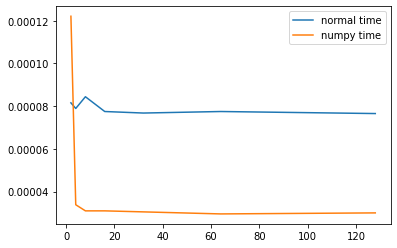

In [55]:
import matplotlib.pyplot as pyplot

pyplot.plot(count,time_our,label="normal time")
pyplot.plot(count,time_np,label="numpy time")
pyplot.legend()
pyplot.show()


&#9989; <font color=red>**QUESTION:**</font> How can you make the `multiply` function faster? Explore the Internet for ways to speed up Python (There are a lot of them).  Save some of your search results in the cell below and come to class prepaired to discuss what you found.

<font size=+3>&#9998;</font> 
1. Einstiens summation method
2. methods using assembly language underneath the code. Example: matmul in pytorch and tensorflow

----
<a name="hpc"></a>
# How to use a high performance computing system
In addition to making your code go faster we can use a faster computer or a computing system with more computers you can use, an example is the MSU High Performance Computing Center (HPC). If you don't have an account in HPC yet, your instructor has submitted a request to get you an account on the MSU so you should be ready to go.

&#9989; <font color=blue>**DO THIS:**</font>  Watch the following video that explains the system and how to gain access. 

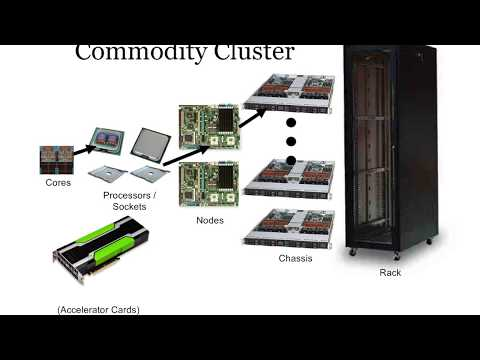

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo("6oyoS-ddUH0",width=640,height=360)

## Install required software

In order to access the HPC you need an SSH client and optionally an X11 client (For graphics).  Although the instructors has a few ways to work around the problem if you have trouble (For example, we can also use the Terminal option inside [Jupyterhub](http://jupyterhub.egr.msu.edu)). That being said, your personal laptops will work best if you have the following installed:

- SSH and SCP client - pre-installed on Mac/Linux, Lots of options for Windows. Ex: [MobaXterm](https://mobaxterm.mobatek.net/) - 
- X11 client - [XQuartz](https://www.xquartz.org/) on Mac, pre-installed on Linux, Lots of options for Windows. Ex [MobaXterm](https://mobaxterm.mobatek.net/)
/
Note, there are a lot of options here. Make sure their software is running properly.

## Logging onto the HPCC



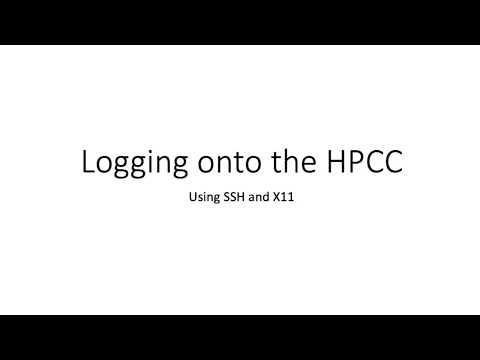

In [57]:
from IPython.display import YouTubeVideo
YouTubeVideo("ODcuHJDIVr4",width=640,height=360)


&#9989; <font color=red>**QUESTION:**</font> Are you able to log on to the HPCC and if not, where did you get stuck?

No

## Using git on the HPCC

Like in Day02 pre-class assginment. You are asked to clone a test repository to your HPCC directory. 

- Log into the HPCC
- Creat a `cmse802` directory and go into the directory.
- Clone `cmse802-yourlastname` repo.

Remember, for this to work, you need to setup `ssh key` like what you did for your computer.


----
<a name="Assignment_wrap-up"></a>
# Assignment wrap-up

Please fill out the [pre-class survey](https://docs.google.com/forms/d/e/1FAIpQLSfhEjAujkrA3E5h739qRzj9buceC2PhbCrSnc6ecHZoDydroQ/viewform) to receive credit for this assignment. 

---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit this notebook file before the assignment due date.

&#169; Copyright 2021,  Michigan State University Board of Trustees